# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

# <font color = 'red'> Step 1 

### Importing data

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# <font color = 'red'> Step 2

### Performing EDA On Data

### Checking Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Checking for Null Values

In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Checking for Duplicate Values

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()]

,YearsExperience,Salary


# <font color = 'red'> Step 3

### Checking for Homoscedasticity or Hetroscedasticity

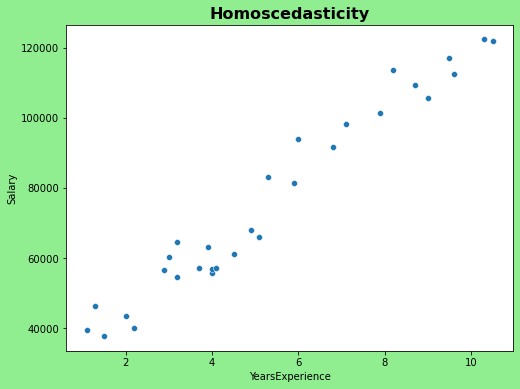

In [13]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [11]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

## <font color='red'>As you can see in above graph
+ It shows as the Salary Increases the Years of Experience increases with very less variation along the way in data
+ The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

# <font color = 'red'> Step 4

### Checking the Correlation between variables

In [16]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## <font color='red'>As you can see above 
+ There is good correlation between the two variable.
+ The score is more than 0.8 which is a good sign

# <font color = 'red'> Step 5

### Plotting the data to check for outliers

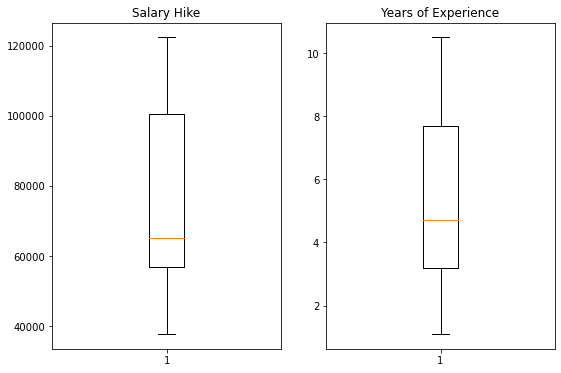

In [18]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

## <font color='red'> As you can see there are no Outliers in the data 

# <font color = 'red'> Step 6

### Trying different transformation of data to estimate normal distribution and remove any skewness 

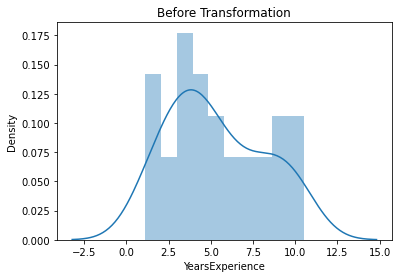

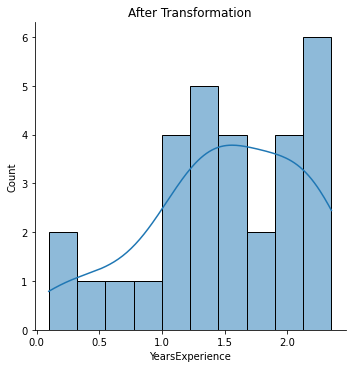

In [19]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

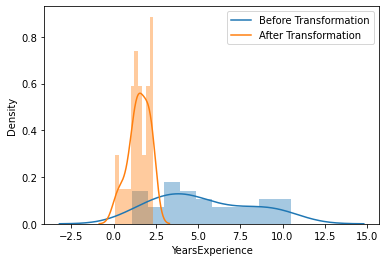

In [20]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

## <font color='red'> As you can see 
+ How log transformation affects the data and it scales the values down.
+ Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

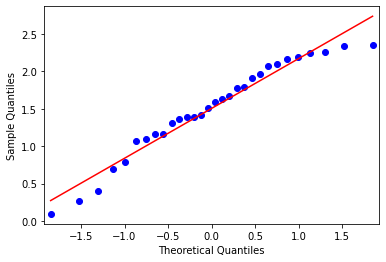

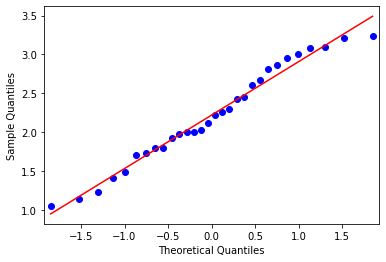

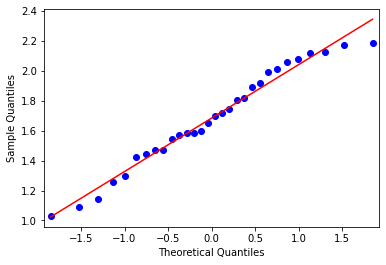

In [22]:
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.show()

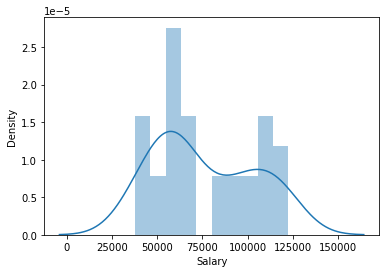

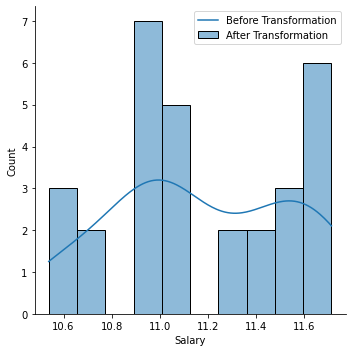

In [27]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.displot(np.log(df['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

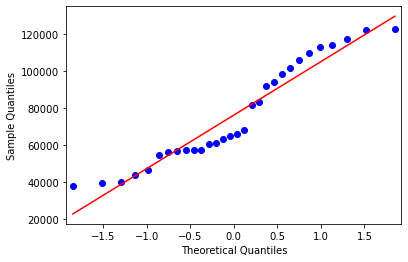

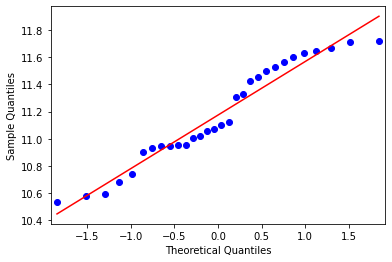

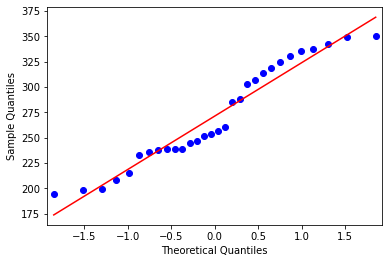

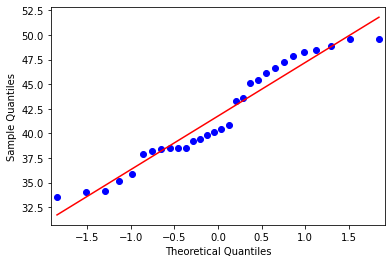

In [30]:
smf.qqplot(df['Salary'], line = 'r')
smf.qqplot(np.log(df['Salary']), line = 'r')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.show()

# <font color='red'>Important Note:</font> 
+ We only Perform any data transformation when the data is skewed or not normal

# <font color = 'red'> Step 7

### Fitting a Linear Regression Model 

In [4]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        15:59:30   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model 
+ The R-squared and adjecent R-squared scores are above 0.85. 
+ (It is a thumb rule to consider Adjacent R-squared to be greater than 0.8 for a good model for prediction)
+ F-statitics is quite high as well and yes desire it to be higher
+ But log-likelihood is quite very low far away from 0
+ and AIC and BIC score are much higher for this model 
+ Lets Try some data transformation to check whether these scores can get any better than this.

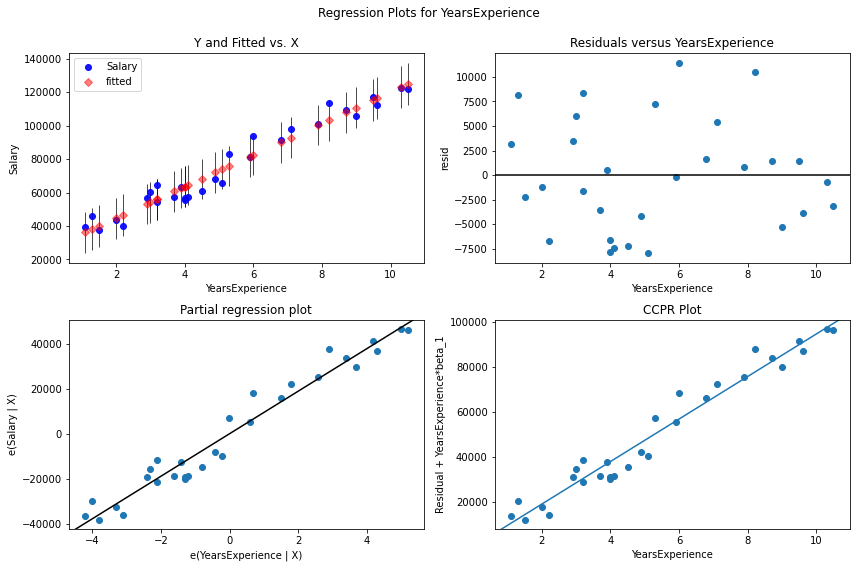

In [33]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model, 'YearsExperience', fig=fig)

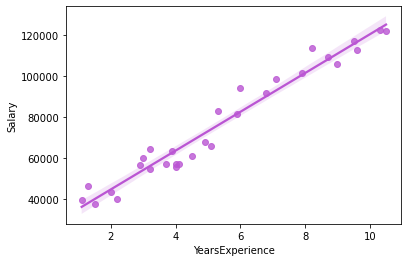

In [35]:
sns.regplot(x = 'YearsExperience',  y = 'Salary', data = df, color = 'mediumorchid')
plt.show()

### Log transformation on dependent variable

In [6]:
model1 = sm.ols('np.log(Salary)~YearsExperience', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           7.03e-18
Time:                        15:59:35   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model 
+ The R-squared and adjecent R-squared scores are above 0.85. but its has gotten less than previous model
+ (It is a thumb rule to consider Adjacent R-squared to be greater than 0.8 for a good model for prediction)
+ F-statitics has gotten a little lower for this model than previous.
+ But log-likelihood got better than before close to 0 higher than previous model
+ and AIC and BIC score are now much better for this model 
+ Lets Try some data transformation to check whether these scores can get any better than this.

### Log transformation on both dependent as well as independent variable

In [8]:
model2 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           7.40e-16
Time:                        15:59:39   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

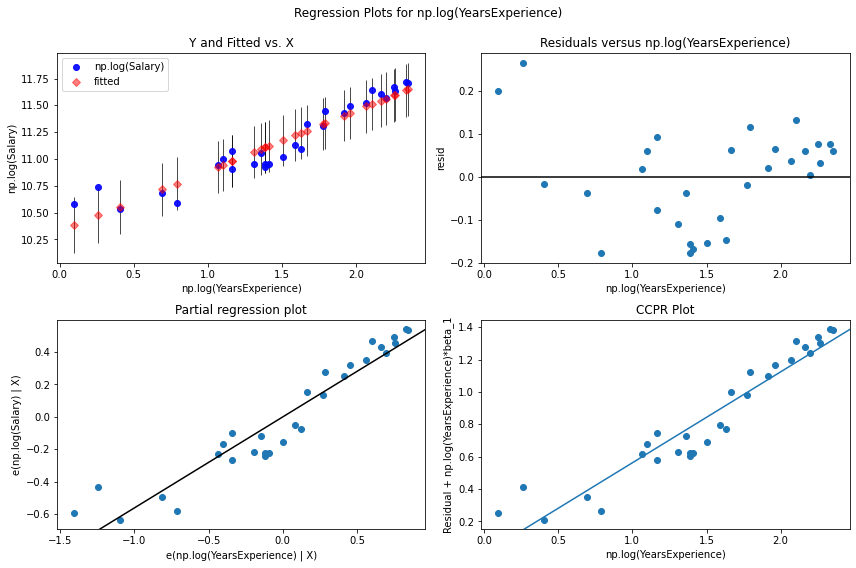

In [38]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model2, 'np.log(YearsExperience)', fig=fig)

### Log transformation on dependent and independent variable + square transformation on independent variable

In [9]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)+np.square(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     198.0
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           7.38e-17
Time:                        15:59:42   Log-Likelihood:                 29.138
No. Observations:                  30   AIC:                            -52.28
Df Residuals:                      27   BIC:                            -48.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.4654      0.060    173.912      0.000      10.342      10.589
np.log(YearsExperience)        0.3769      0.059      6.423      0.000       0.257       0.497
np.square(YearsExperience)     0.0039      0.001      3.618      0.001       0.002       0.006
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.067
Skew:                           0.163   Prob(JB):                        0.587
Kurtosis:                       2.136   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting differente plots of the model to check the regression line 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
lm = LinearRegression()

x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

reg_sklearn = lm.fit(x,y)

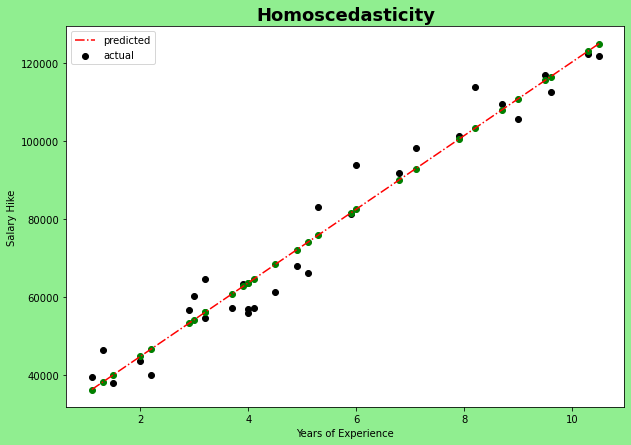

In [17]:
plt.figure(figsize=(10,7), facecolor ='lightgreen')
plt.scatter(df['YearsExperience'], df['Salary'], color = 'black', label='actual')
plt.plot(df['YearsExperience'], reg_sklearn.predict(x), color = 'red', linestyle='-.', label = 'predicted')
plt.scatter(df['YearsExperience'], reg_sklearn.predict(x), color = 'green')
plt.xlabel('Years of Experience')
plt.ylabel("Salary Hike")
plt.title('Homoscedasticity', fontsize = 18, fontweight = 'bold')
plt.legend(loc='best')
plt.show()

# <font color = 'red'> Step 8

### Model Validation
### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value. 

### Comparing different models with respect to the Root Mean Squared Errors

In [10]:
from sklearn.metrics import mean_squared_error

In [14]:
model1_pred_y =np.exp(model1.predict(df['YearsExperience']))
model2_pred_y =np.exp(model2.predict(df['YearsExperience']))
model3_pred_y =np.exp(model3.predict(df['YearsExperience']))

In [18]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 7213.235076620129 
model2= 7219.716974372802 
model3= 6427.430081576869


In [19]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

## <font color='red'>As model has the minimum RMSE and highest Adjacent R-squared score. Hence, we are going to use model to predict our values 
+ Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest adjacent R-squared value

# <font color = 'red'> Step 9

#  Predicting values

In [24]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df.YearsExperience
predicted2['Salary'] = df.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [29]:
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', pow(np.sqrt(model1.mse_resid),10),'\n' 'model2=', np.sqrt(np.exp(model2.mse_resid)),'\n' 'model3=', np.sqrt(np.exp(model3.mse_resid)))

model= 5788.315051119395 
model1= 8.082591248871079e-11 
model2= 1.0066980899940352 
model3= 1.0046733089816207


# <font color = 'red'> Step 10

### Trying different models

In [20]:
model4 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
print(np.sqrt(model4.mse_resid))

12.178298906837778


In [21]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           7.58e-19
Time:                        14:45:22   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model5 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           6.37e-18
Time:                        16:13:18   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can see above the adjacent R-squared value is getting lower there is no point on going forward